In [7]:
# Use et2 for compatibility
from kuibit.simdir import SimDir
import kuibit.visualize_matplotlib as viz
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# set plot theme 
sns.set_theme(context='notebook', style='darkgrid', palette='colorblind')

In [ ]:
sim = SimDir('/home/jorge/Downloads/output-0000/testPert32_B')

In [4]:
print(sim)

Indexed 34 files and 1 subdirectories
Folder /home/jorge/Downloads/output-0000/testPert32_H
/home/jorge/Downloads/output-0000/testPert32_H
Available scalar timeseries:
[]

Available minimum timeseries:
[]

Available maximum timeseries:
[]

Available norm1 timeseries:
[]

Available norm2 timeseries:
[]

Available average timeseries:
['kxx', 'kxy', 'kxz', 'kyy', 'kyz', 'kzz', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'alp', 'H', 'rho', 'betax', 'betay', 'betaz', 'M1', 'M2', 'M3']
Variables available: dict_keys([])

Available grid data of dimension 1D (x): 
[]


Available grid data of dimension 1D (y): 
[]


Available grid data of dimension 1D (z): 
[]


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
['kxx', 'kxy', 'kxz', 'kyy', 'kyz', 'kzz', 'Ricci11', 'Ricci12', 'Ricci13', 'Ricci22', 'Ricci23', 'Ricci33', 'Ricci', 'trK', 'detg', 'NaNmask', 'rho', '

In [ ]:
# Available iterations

avail_iter = sim.gf.xyz['kxx'].available_iterations 
print(f'{sim.gf.xyz['kxx'].available_iterations[:3]} ... {sim.gf.xyz['kxx'].available_iterations[-3:]}')

In [5]:
M1 = sim.timeseries.average['M1']
M2 = sim.timeseries.average['M2']
M3 = sim.timeseries.average['M3']
H  = sim.timeseries.average['H']

'''
li=12
plt.figure(figsize=(12,5))
plt.suptitle("Hamiltonian and Momentum average timeseries", fontsize=15)
plt.subplot(2,1,1)
plt.plot(M1.y[:-li], label='M1')
plt.plot(M3.y[:-li], label='M2', linestyle='--')
plt.plot(M2.y[:-li], label='M3', linestyle='-.')
plt.ylabel('M')
#plt.legend()

n=1300
H_n = round(H.y[n],4)
plt.subplot(2,1,2)
plt.plot(H.y[:-li], label='H')
plt.plot(n, H.y[n], label=f'H({n})={H_n}', color="red", marker="4", markersize=18)
plt.xlabel('Iterations')
plt.ylabel('H')
plt.legend()
'''

'\nli=12\nplt.figure(figsize=(12,5))\nplt.suptitle("Hamiltonian and Momentum average timeseries", fontsize=15)\nplt.subplot(2,1,1)\nplt.plot(M1.y[:-li], label=\'M1\')\nplt.plot(M3.y[:-li], label=\'M2\', linestyle=\'--\')\nplt.plot(M2.y[:-li], label=\'M3\', linestyle=\'-.\')\nplt.ylabel(\'M\')\n#plt.legend()\n\nn=1300\nH_n = round(H.y[n],4)\nplt.subplot(2,1,2)\nplt.plot(H.y[:-li], label=\'H\')\nplt.plot(n, H.y[n], label=f\'H({n})={H_n}\', color="red", marker="4", markersize=18)\nplt.xlabel(\'Iterations\')\nplt.ylabel(\'H\')\nplt.legend()\n'

In [6]:
# cctk time
t = np.array(M1.x)

# Constants
G=1.
Omega_matter0 = 0.3147              # from param.ccl "Matter Density Parameter Today"
Omega_lambda0 = 1. - Omega_matter0
ICPertFLRW_h = 0.6737                   #Dimenstionless hubble parameter
z_comoving_ref = 0.
a0 = 1. + z_comoving_ref            # "Comoving reference redshift: a_0 = 1 + z_comoving_ref"
H0 = ICPertFLRW_h * 1. / 2997.9         # Units are Mpc
t0_EdS= 2. / ( 3. * H0 )                # Used for both models

aa = a0 * (Omega_matter0 / Omega_lambda0 )**(1./3.) * (np.sinh( np.sqrt(Omega_lambda0) * t / t0_EdS ) ** (2./3.))                               #Follow ICCalc.F90 and param.ccl
Hprop = H0 * np.sqrt(Omega_matter0 * ( aa / a0 )**(-3.) + Omega_lambda0 )
Omega_matter = Omega_matter0 / ( Omega_matter0 + Omega_lambda0 * ( aa / a0 )**3.)
kappa = 8. * np.pi * G 
rhoflrw = 3. * Hprop**2. * Omega_matter / kappa

# Scalar, 1 for each cctk time
# Use s = aa/a0 to avoid some notation overload  

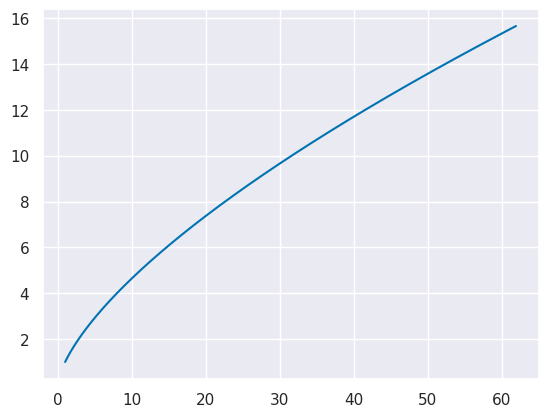

In [7]:
plt.plot(t[:5080], aa[:5080]/aa[0], label="aa/a0")

In [ ]:
# This is nonsense, we're only getting up to 16 when we need to go to 50 or 60 
# This for testPert32_B

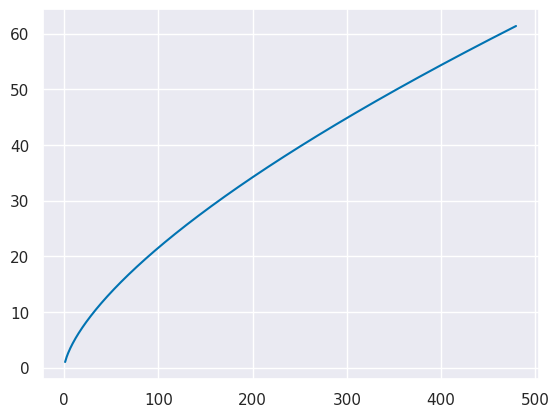

In [8]:
t_test = np.arange(1, 480, 0.8)
aa_test = a0 * (Omega_matter0 / Omega_lambda0 )**(1./3.) * (np.sinh( np.sqrt(Omega_lambda0) * t_test / t0_EdS ) ** (2./3.))
    
plt.plot(t_test, aa_test/aa_test[0])    

Well well, I hope my laptop is prepared...

# Simulation testPert32_D

In [8]:
sim = SimDir('/home/jorge/Downloads/output-0000/testPert32_D')

In [18]:
# Available iterations

avail_iter = sim.gf.xyz['kxx'].available_iterations 
print(f'{sim.gf.xyz['kxx'].available_iterations[:3]} ... {sim.gf.xyz['kxx'].available_iterations[-3:]}')

[0, 80, 160] ... [39760, 39840, 39920]


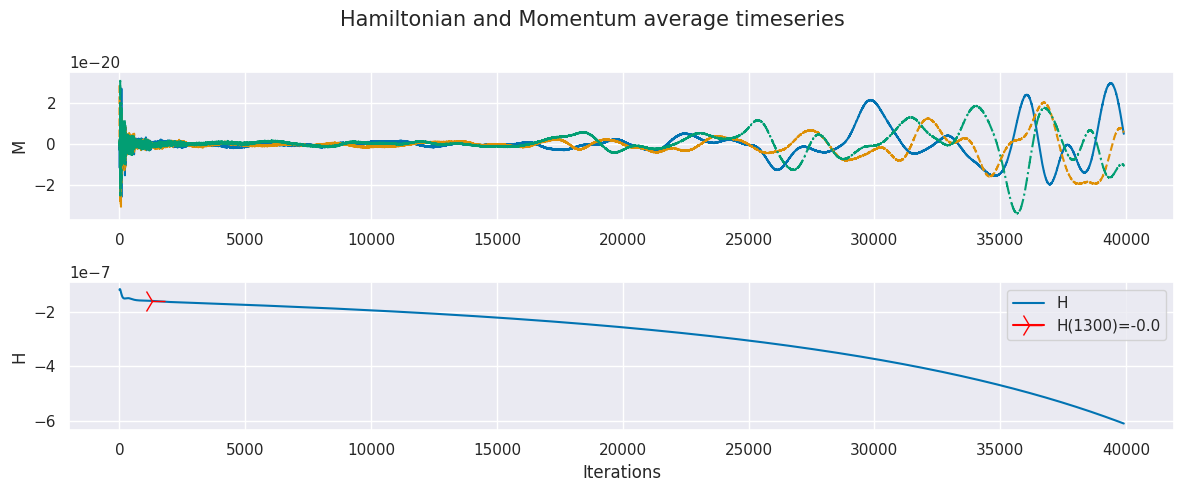

In [10]:
M1 = sim.timeseries.average['M1']
M2 = sim.timeseries.average['M2']
M3 = sim.timeseries.average['M3']
H  = sim.timeseries.average['H']

li=12
plt.figure(figsize=(12,5))
plt.suptitle("Hamiltonian and Momentum average timeseries", fontsize=15)
plt.subplot(2,1,1)
plt.plot(M1.y[:-li], label='M1')
plt.plot(M3.y[:-li], label='M2', linestyle='--')
plt.plot(M2.y[:-li], label='M3', linestyle='-.')
plt.ylabel('M')
#plt.legend()

n=1300
H_n = round(H.y[n],4)
plt.subplot(2,1,2)
plt.plot(H.y[:-li], label='H')
plt.plot(n, H.y[n], label=f'H({n})={H_n}', color="red", marker="4", markersize=18)
plt.xlabel('Iterations')
plt.ylabel('H')
plt.legend()

plt.tight_layout()

In [11]:
# cctk time
t = np.array(M1.x)

# Constants
G=1.
Omega_matter0 = 0.3147              # from param.ccl "Matter Density Parameter Today"
Omega_lambda0 = 1. - Omega_matter0
ICPertFLRW_h = 0.6737                   #Dimenstionless hubble parameter
z_comoving_ref = 0.
a0 = 1. + z_comoving_ref            # "Comoving reference redshift: a_0 = 1 + z_comoving_ref"
H0 = ICPertFLRW_h * 1. / 2997.9         # Units are Mpc
t0_EdS= 2. / ( 3. * H0 )                # Used for both models

aa = a0 * (Omega_matter0 / Omega_lambda0 )**(1./3.) * (np.sinh( np.sqrt(Omega_lambda0) * t / t0_EdS ) ** (2./3.))                               #Follow ICCalc.F90 and param.ccl
Hprop = H0 * np.sqrt(Omega_matter0 * ( aa / a0 )**(-3.) + Omega_lambda0 )
Omega_matter = Omega_matter0 / ( Omega_matter0 + Omega_lambda0 * ( aa / a0 )**3.)
kappa = 8. * np.pi * G 
rhoflrw = 3. * Hprop**2. * Omega_matter / kappa

# Scalar, 1 for each cctk time
# Use s = aa/a0 to avoid some notation overload  

Text(0, 0.5, 'a/a_IN')

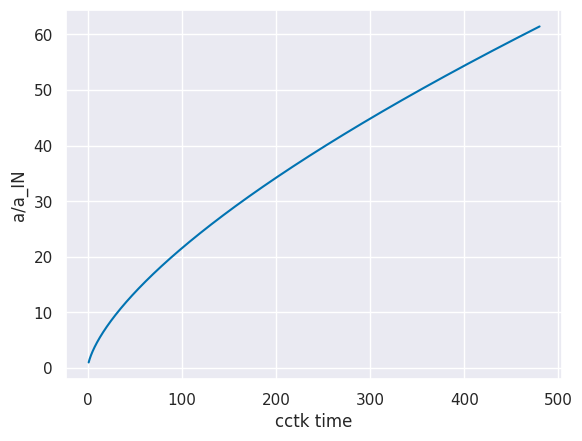

In [19]:
plt.plot(t, aa/aa[0], label="aa/a0")
plt.xlabel("cctk time")
plt.ylabel("a/a_IN")

Great, we got passed 60 :) But the simulation did not collapsed :(

In [14]:
# Define grid functions

kxx, gxx = sim.gf.xyz['kxx'], sim.gf.xyz['gxx']               # sim.gf.dim['var'][iteration]
kxy, gxy = sim.gf.xyz['kxy'], sim.gf.xyz['gxy']
kxz, gxz = sim.gf.xyz['kxz'], sim.gf.xyz['gxz']
kyy, gyy = sim.gf.xyz['kyy'], sim.gf.xyz['gyy']
kyz, gyz = sim.gf.xyz['kyz'], sim.gf.xyz['gyz']
kzz, gzz = sim.gf.xyz['kzz'], sim.gf.xyz['gzz']

rho = sim.gf.xyz['rho']

In [ ]:
rho[80][0][0][-8, -8, -8]     # UD

0.01343123172959307

In [ ]:
rho[80][0][0][8, 8, 8]      # OD

0.01420951026542326

In [21]:
# make lists

od_list = [rho[i][0][0][8, 8, 8] for i in range(0, 39921, 80)] 
ud_list = [rho[i][0][0][-8, -8, -8] for i in range(0, 39921, 80)] 
ct_list = [rho[i][0][0][16, 16, 16] for i in range(0, 39921, 80)] 

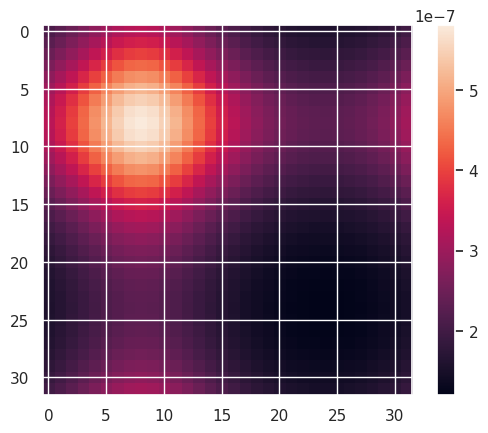

In [37]:
plt.imshow(rho[39920][0][0][:, :, 31])
plt.colorbar()

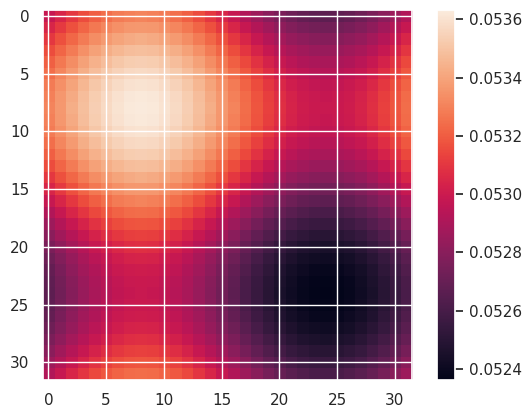

In [38]:
plt.imshow(rho[0][0][0][:, :, 31])
plt.colorbar()

Text(0.5, 1.0, '$\\rho_{OD} \\text{ and } \\rho_{UD} $')

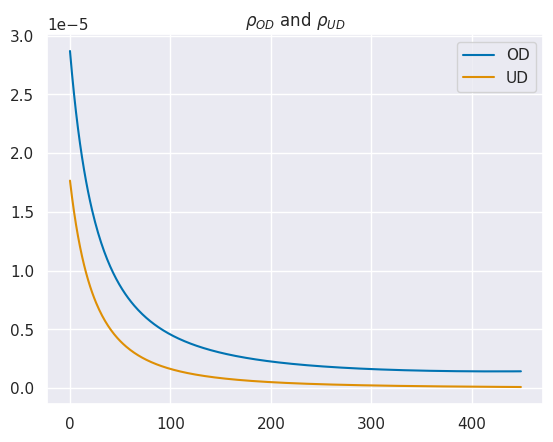

In [ ]:
# rho at the od and ud

plt.plot(od_list[-450:], label='OD')
plt.plot(ud_list[-450:], label='UD')
plt.legend()
plt.xlabel('cctk time')
plt.title(r'$\rho_{OD} \text{ and } \rho_{UD} $')

these 2 curves being so close maybe means the perturbation was too small

In [47]:
rhoflrw[::80][-450:].shape

(450,)

In [ ]:
# scale factor less smooth

t_ls = t[::80]
aa_ls = a0 * (Omega_matter0 / Omega_lambda0 )**(1./3.) * (np.sinh( np.sqrt(Omega_lambda0) * t_ls / t0_EdS ) ** (2./3.))

# Aplicar el corse level antes o depues de calcular a, es lo mismo
# (aa[:avail_iter_max+1:diter]==aa_co).sum()

Text(8, 3.5, 'A_pert=7.5e-4\nlambda_pert=640')

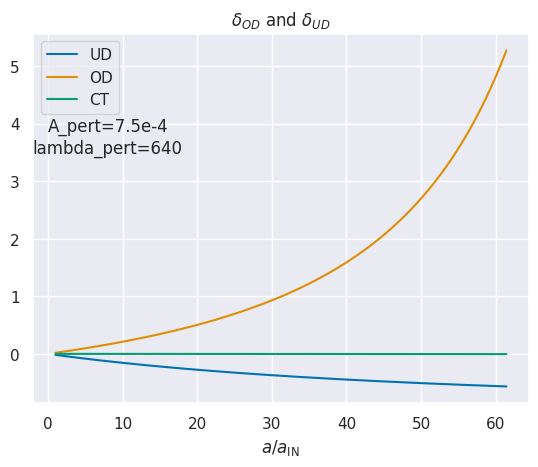

In [23]:
# now plot the contrast at these 2 places + the center of the box

ind = 0
x = aa_ls/aa_ls[0] 
plt.plot(x,ud_list[ind:]/rhoflrw[::80][ind:] -1, label='UD')
plt.plot(x,od_list[ind:]/rhoflrw[::80][ind:]- 1, label='OD')
plt.plot(x,ct_list[ind:]/rhoflrw[::80][ind:] -1, label='CT')
plt.legend()
#plt.xlabel('cctk time')
plt.xlabel(r'$a/a_{\text{IN}}$')
plt.title(r'$\delta_{OD} \text{ and } \delta_{UD} $')
plt.annotate(
    'A_pert=7.5e-4\nlambda_pert=640',  # Annotation text
    xy=(5, 3.5),     # Point being annotated (arrow target)
    xytext=(8, 3.5), # Position of the text
    #arrowprops=dict(facecolor='black', shrink=0.05), # Arrow properties
    ha='center'    # Horizontal alignment of the text
)

# old label: r'$A_\text{pert}=7.5\cdot 10^{-4}$  $\lambda_\text{pert}=640$'

Then we know we should increase a bit the perturbation

- Add 1st order projetions
- From now on, use this 480 upper limit for the cctk_time
- Run simulations with slightly bigger perturbations
- Make all the other plots: $\delta\gamma$, $\delta K$ and the ones for the Ricci

In [24]:
# Initial value for the density contrast at the overdensity

od_list[0]/rhoflrw[0]- 1

0.018382014620621057

In [10]:
# function to calculate the initial density contrast at the overdensity

def delta_ini(simdir):
     
    t0 = 1.0                  # cctk time

    # Constants
    G=1.
    kappa = 8. * np.pi * G
    Omega_matter0 = 0.3147                # from param.ccl "Matter Density Parameter Today"
    Omega_lambda0 = 1. - Omega_matter0
    ICPertFLRW_h = 0.6737                   #Dimenstionless hubble parameter
    z_comoving_ref = 0.
    a0 = 1. + z_comoving_ref            # "Comoving reference redshift: a_0 = 1 + z_comoving_ref"
    H0 = ICPertFLRW_h * 1. / 2997.9         # Units are Mpc
    t0_EdS= 2. / ( 3. * H0 )                # Used for both models

    # Actual calculations
    aa = a0 * (Omega_matter0 / Omega_lambda0 )**(1./3.) * (np.sinh( np.sqrt(Omega_lambda0) * t0 / t0_EdS ) ** (2./3.))                               #Follow ICCalc.F90 and param.ccl
    Hprop = H0 * np.sqrt(Omega_matter0 * ( aa / a0 )**(-3.) + Omega_lambda0 )
    Omega_matter = Omega_matter0 / ( Omega_matter0 + Omega_lambda0 * ( aa / a0 )**3.) 
    rhoflrw0 = 3. * Hprop**2. * Omega_matter / kappa

    rho_0_OD = simdir.gf.xyz['rho'][0][0][0][8, 8, 8] 

    return rho_0_OD/rhoflrw0 - 1


# 64-box first Apert tests and Sim 32_I 

For the 32_I simulation, we adjusted Apert to $\delta_{IN}$=0.03 based on a simple linear regression

In [ ]:
sim4 = SimDir('~/Downloads/output-0000/test_32lambda_in6')
#sim1=SimDir('/media/jorge/Ventoy/output-0000/testPert64_E')
#sim2=SimDir('/media/jorge/Ventoy/output-0000/testPert64_F')     # 
#sim3=SimDir('/media/jorge/Ventoy/output-0000/testPert32_I')    # I: 0.02903221369268949
#print(delta_ini(sim1))
#print(delta_ini(sim2))
print(delta_ini(sim4))          # Way off for the linear approximation

0.030446212600836242


we didn't quite get there... maybe the relation between Apert and $\delta_{IN}$ is not linear

Add this to the table of simulations

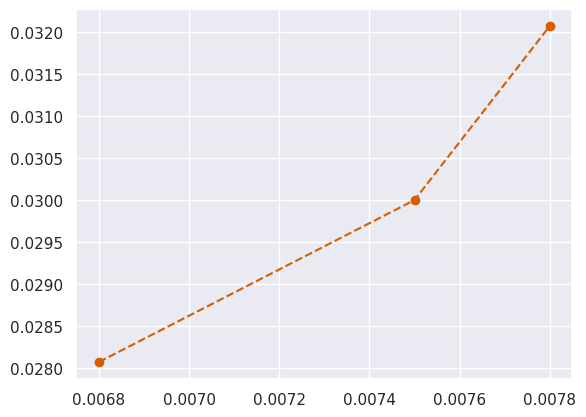

In [18]:
#plt.plot([1.17e-3, 1.8e-3, 7.5e-3],[0.004936411876385494, 0.00757590044801959, 0.03], 'r--o')

plt.plot([6.8e-3, 7.5e-3, 7.8e-3],[0.02807,0.03, 0.0320748], 'r--o')


# Initial matter density contrast along all simulations

In [34]:
delta_ini_list=[]
for i in ['B', 'C', 'D', 'E', 'F', 'G', 'H']:
    sim1 = SimDir(f'/home/jorge/Downloads/output-0000/testPert32_{i}')
    print(f'Sim {i} - delta0={delta_ini(sim1)}')
    delta_ini_list.append(delta_ini(sim1))

Sim B - delta0=0.018382014620621057
Sim C - delta0=0.2066586811010631
Sim D - delta0=0.018382014620621057
Sim E - delta0=0.0785759045702894
Sim F - delta0=0.02469009080924711
Sim G - delta0=0.045501700821970026
Sim H - delta0=0.04020930521645538


**NOTA IMPORTANTE**: la simulación H fue seteada incorrectamente, tiene una amplitud asimétrica, por lo cual debe descartarse para los análisis usuales

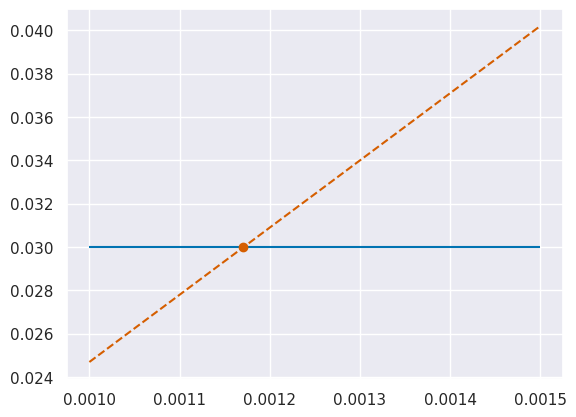

In [52]:
Apert = [7e-3, 7.5e-4, 3e-3, 1e-3, 1.8e-3, 1.5e-3]

#plt.plot(Apert, delta_ini_list[1:], 'or')
#plt.hlines(y=0.03, xmin=0.0005, xmax=0.004)
#plt.vlines(x=0.0012, ymin=0.024, ymax=0.05)
plt.plot([1e-3, 1.5e-3], [0.024690,0.0402 ], 'r--')
plt.hlines(y=0.03, xmin=0.001, xmax=0.0015)
plt.plot(0.00117, 0.03, 'ro')

- Got it, that's the number: 0.00117, at least for this 32^3 box
- Nope, not quite
- Looking at the linear approximation, I get a value around 

In [ ]:
# Utilizar las ecuaciones 15 o 16 del paper para poder relacionar Apert con el contraste inicial  
# Write grid fucntions every 320 iterations

# Contraste inicial

1. Usando la aproximación lineal 
2. Usando el constraint Hamiltoniano

In [2]:
import numpy as np

In [ ]:
## Aproximación lineal

# Constants
G=1.
kappa = 8. * np.pi * G
Omega_matter0 = 0.3147                
Omega_lambda0 = 1. - Omega_matter0
ICPertFLRW_h = 0.6737                   # Dimenstionless hubble parameter
z_comoving_ref = 0.
a0 = 1. + z_comoving_ref                # Comoving reference redshift: a_0= 1+z_comoving_ref
H0 = ICPertFLRW_h * 1. / 2997.9         # 1/Mpc ; 2997.9 [Mpc]

Omega_matter = Omega_matter0 / ( Omega_matter0 + Omega_lambda0 ) 
f1 = Omega_matter ** (6/11)
F_IN = f1 + 3/2 * Omega_matter
H_IN = H0 * np.sqrt(Omega_matter0 + Omega_lambda0)          # Assuming s_IN = 1 (Which is wrong)

def Apert(delta_in, lambda_pert):
    A_pert = F_IN * H_IN**2 * delta_in * lambda_pert**2 / (12. * np.pi**2) 
    return A_pert


def a_factor(t):
    t0_EdS= 2. / ( 3. * H0 ) 
    scale_factor = a0 * (Omega_matter0 / Omega_lambda0 )**(1./3.)*\
        (np.sinh( np.sqrt(Omega_lambda0) * t / t0_EdS ) ** (2./3.))
    return scale_factor  

#aa = a_factor(tau=1)   
#Hprop = H0 * np.sqrt(Omega_matter0 * ( aa / a0 )**(-3.) + Omega_lambda0)

# Assuming s!=1 at IN, then
def Apert2(delta_in, lambda_pert):
    t = 1.
    t0_EdS= 2. / ( 3. * H0 ) 
    s = (Omega_matter0 / Omega_lambda0 )**(1./3.)*\
        (np.sinh( np.sqrt(Omega_lambda0) * t / t0_EdS ) ** (2./3.))
    
    H_IN = H0 * np.sqrt(Omega_matter0 * s**(-3.) + Omega_lambda0 )
    Omega_matter = Omega_matter0 / ( Omega_matter0 + Omega_lambda0 * s**3.) 
    f1 = Omega_matter ** (6/11)
    F_IN = f1 + (3/2) * Omega_matter

    A_pert = F_IN * H_IN**2 * delta_in * lambda_pert**2 / (12. * np.pi**2) 
    return A_pert

# Desde el laplaciano, hay un factor a^2 que debes incluir en Apert, ver corrección más abajo

In [28]:
Apert(0.03, 640),Apert2(0.03, 640)  

(5.262204139869927e-06, 115.28098980627746)

- Esperaría que fuese un número cercano a 1.17e-3
- Me faltó agregar el factor $a^{-2}$ que viene de la definición del Laplaciano en este gauge

In [13]:
0.00329**2          # a_IN^2

1.08241e-05

In [24]:
# a_IN = 0.00329

# rounded a_factor
print(Apert2(0.03, 640) * 0.00329**2)          # Apert según esta aproximación lineal

# exact a_factor
print(Apert2(0.03, 640)*0.003294524141074402**2)

0.0012478129617621279
0.001251247103610327


In [42]:
# Test sobre simulaciones cortas
from localutils import delta_ini 

Aper_list = [1.15e-3, 1.17e-3, 1.2e-3, 1.25e-3, 1.225e-3,
            0.0012478129617621279, 1.2075e-3, 1.251247103610327e-3, 1.2077e-3]  
delta_ini_list2 = []

for i in range(2,11):
    sim1 = SimDir(f'/home/jorge/Downloads/output-0000/test_32lambda_in{i}')
    print(f'Sim {i} - Apert= {Aper_list[i-2]} - delta0= {delta_ini(sim1, 8)}')
    delta_ini_list2.append(delta_ini(sim1, 8))

Sim 2 - Apert= 0.00115 - delta0= 0.028591196503203076
Sim 3 - Apert= 0.00117 - delta0= 0.02903221369268949
Sim 4 - Apert= 0.0012 - delta0= 0.02980292672438667
Sim 5 - Apert= 0.00125 - delta0= 0.03109043155561353
Sim 6 - Apert= 0.001225 - delta0= 0.030446212600836242
Sim 7 - Apert= 0.0012478129617621279 - delta0= 0.031034037023248917
Sim 8 - Apert= 0.0012075 - delta0= 0.029995814583579694
Sim 9 - Apert= 0.001251247103610327 - delta0= 0.03112259232175063
Sim 10 - Apert= 0.0012077 - delta0= 0.03000095940823022


In [43]:
#delta_ini_list2[1]-delta_ini_list2[0]
delta_ini_list2[-1]-delta_ini_list2[-3]

5.1448246505270134e-06

In [44]:
0.03-delta_ini_list2[-3],0.03-delta_ini_list2[-1] 

(4.185416420304788e-06, -9.59408230222225e-07)

In [ ]:
# \Delta Apert = 0.00002    -->  \Delta delta = 0.00044101718948641455
# \Delta Apert = 0.0000002  -->  \Delta delta = 0.0000051448246505270134

# se conjetura que para un Delta en Apert x, hay un Delta en delta_IN = 23x (aproximadamente)  

0.00117

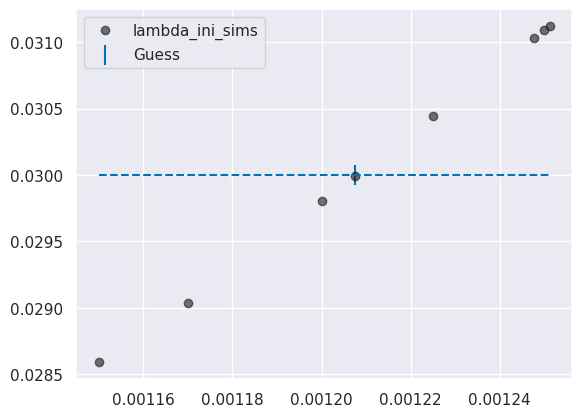

In [39]:
plt.plot(Aper_list, delta_ini_list2, 'ko', alpha=.6, label="lambda_ini_sims")
plt.hlines(y=0.03, xmin=Aper_list[0] , xmax=Aper_list[-1], linestyle='--')
plt.scatter(0.0012075, 0.03, label='Guess', marker='|', s=204)
plt.legend()

# Between 0.0012 and 0.001225

# Test for box64: constraste inicial

In [52]:
# Test sobre simulaciones cortas box64
from localutils import delta_ini 
import string

Aper_list = [1.17e-3, 1.8e-3, 6.8e-3, 7.8e-3, 7.5e-3, 7.3e-3]  
delta_ini_list2 = []
sims_l = string.ascii_uppercase

for i in range(6):
    sim1 = SimDir(f'/home/jorge/Downloads/output-0000/testPert64_{sims_l[i]}')
    print(f'Sim {i} - Apert= {Aper_list[i]} - delta0= {delta_ini(sim1, 8)}')
    delta_ini_list2.append(delta_ini(sim1, 8))

Sim 0 - Apert= 0.00117 - delta0= 0.004936411876385494
Sim 1 - Apert= 0.0018 - delta0= 0.00757590044801959
Sim 2 - Apert= 0.0068 - delta0= 0.02807084964649742
Sim 3 - Apert= 0.0078 - delta0= 0.03207480690803011
Sim 4 - Apert= 0.0075 - delta0= 0.030876898344461612
Sim 5 - Apert= 0.0073 - delta0= 0.03007673335206351


Cómo referencia, este es el Apert usado para box32: 0.0012077

# Test for box128: constraste inicial

- Still working on this

In [ ]:
# Test sobre simulaciones cortas box128
from localutils import delta_ini 
import string

Aper_list = []  
delta_ini_list2 = []
sims_l = string.ascii_uppercase

for i in range(6):
    sim1 = SimDir(f'/home/jorge/Downloads/output-0000/testPert128_{sims_l[i]}')
    print(f'Sim {i} - Apert= {Aper_list[i]} - delta0= {delta_ini(sim1, 8)}')
    delta_ini_list2.append(delta_ini(sim1, 8))

# Contributions to the Raychaudhuri equation

In [ ]:
# Check cosmological constant with lambda pert

lambda_pert = 1821          # Mpc
cosm_conts = 1.0382472680261657e-07

print(cosm_conts * lambda_pert**2 )  # Concuerda con la figura 6

0.3442870508912754


0.0

In [ ]:
# Lambda_pert vs lambda_phy
from localutils import redshift

#sim = SimDir('/home/jorge/Downloads/output-0000/testPert32_D')

lambda_phy = aa * lambda_pert       # Mpc
lambda_phy      

array([  5.99932846,   6.04722761,   6.0949378 , ..., 368.55993912,
       368.56611749, 368.57229581])

In [19]:
avail_iter

[0,
 80,
 160,
 240,
 320,
 400,
 480,
 560,
 640,
 720,
 800,
 880,
 960,
 1040,
 1120,
 1200,
 1280,
 1360,
 1440,
 1520,
 1600,
 1680,
 1760,
 1840,
 1920,
 2000,
 2080,
 2160,
 2240,
 2320,
 2400,
 2480,
 2560,
 2640,
 2720,
 2800,
 2880,
 2960,
 3040,
 3120,
 3200,
 3280,
 3360,
 3440,
 3520,
 3600,
 3680,
 3760,
 3840,
 3920,
 4000,
 4080,
 4160,
 4240,
 4320,
 4400,
 4480,
 4560,
 4640,
 4720,
 4800,
 4880,
 4960,
 5040,
 5120,
 5200,
 5280,
 5360,
 5440,
 5520,
 5600,
 5680,
 5760,
 5840,
 5920,
 6000,
 6080,
 6160,
 6240,
 6320,
 6400,
 6480,
 6560,
 6640,
 6720,
 6800,
 6880,
 6960,
 7040,
 7120,
 7200,
 7280,
 7360,
 7440,
 7520,
 7600,
 7680,
 7760,
 7840,
 7920,
 8000,
 8080,
 8160,
 8240,
 8320,
 8400,
 8480,
 8560,
 8640,
 8720,
 8800,
 8880,
 8960,
 9040,
 9120,
 9200,
 9280,
 9360,
 9440,
 9520,
 9600,
 9680,
 9760,
 9840,
 9920,
 10000,
 10080,
 10160,
 10240,
 10320,
 10400,
 10480,
 10560,
 10640,
 10720,
 10800,
 10880,
 10960,
 11040,
 11120,
 11200,
 11280,
 1136

In [25]:
rho[21600][0][0][:, :, 31]

array([[7.44277791e-07, 7.80746392e-07, 8.19489531e-07, ...,
        6.57417723e-07, 6.82103996e-07, 7.11175098e-07],
       [7.80746392e-07, 8.19821766e-07, 8.61400795e-07, ...,
        6.87920718e-07, 7.14267744e-07, 7.45329895e-07],
       [8.19489531e-07, 8.61400795e-07, 9.06070225e-07, ...,
        7.20192139e-07, 7.48338177e-07, 7.81559848e-07],
       ...,
       [6.57417723e-07, 6.87920718e-07, 7.20192139e-07, ...,
        5.84272601e-07, 6.05131784e-07, 6.29623923e-07],
       [6.82103996e-07, 7.14267744e-07, 7.48338177e-07, ...,
        6.05131784e-07, 6.27060183e-07, 6.52830281e-07],
       [7.11175098e-07, 7.45329895e-07, 7.81559848e-07, ...,
        6.29623923e-07, 6.52830281e-07, 6.80129180e-07]])

In [26]:
# Define rho along the diagonal x=y=z at some scale_factor

rho_diag = []
for i in range(32):
    rho_diag.append(rho[21600][0][0][i, i, i])

In [37]:
# kappa and rho

rho_diag = np.array(rho_diag)               
rho_con = kappa * rho_diag/2 * lambda_pert**2           # para la gráfica
rho_con

array([32.48714361, 37.72871523, 44.21258979, 51.97055092, 60.77838787,
       69.98027211, 78.38204871, 84.40257037, 86.60618206, 84.40257037,
       78.38204871, 69.98027211, 60.77838787, 51.97055092, 44.21258979,
       37.72871523, 32.48714361, 28.34139115, 25.11527508, 22.64438252,
       20.79185292, 19.4514911 , 18.54573709, 18.0222857 , 17.85106805,
       18.0222857 , 18.54573709, 19.4514911 , 20.79185292, 22.64438252,
       25.11527508, 28.34139115])

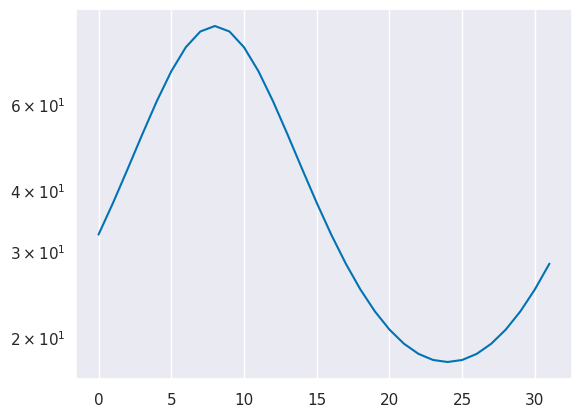

In [ ]:
fig, ax = plt.subplots()
#x = np.logspace(-.5, .5, len(rho_con)) # Data from 1 to 100
y = rho_con

ax.plot(y)
#ax.set_xscale('log') # Set x-axis to logarithmic scale
ax.set_yscale('log') # Set y-axis to logarithmic scale      

# Great

In [31]:
# Pruebo otra simulación

sim = SimDir('/home/jorge/Downloads/output-0000/testPert32_J')
print(sim)

avail_iter = sim.gf.xyz['gxx'].available_iterations 

Indexed 34 files and 1 subdirectories
Folder /home/jorge/Downloads/output-0000/testPert32_J
/home/jorge/Downloads/output-0000/testPert32_J
Available scalar timeseries:
[]

Available minimum timeseries:
[]

Available maximum timeseries:
[]

Available norm1 timeseries:
[]

Available norm2 timeseries:
[]

Available average timeseries:
['kxx', 'kxy', 'kxz', 'kyy', 'kyz', 'kzz', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'alp', 'H', 'rho', 'betax', 'betay', 'betaz', 'M1', 'M2', 'M3']
Variables available: dict_keys([])

Available grid data of dimension 1D (x): 
[]


Available grid data of dimension 1D (y): 
[]


Available grid data of dimension 1D (z): 
[]


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
['kxx', 'kxy', 'kxz', 'kyy', 'kyz', 'kzz', 'Ricci11', 'Ricci12', 'Ricci13', 'Ricci22', 'Ricci23', 'Ricci33', 'Ricci', 'trK', 'detg', 'NaNmask', 'rho', '

In [30]:
## Matter density, trace of K, determinant of g
rho = sim.gf.xyz['rho']
trk = sim.gf.xyz['trK']
detg= sim.gf.xyz['detg'] 

In [ ]:
# continuar ...

In [35]:
## Expansion scalar

K_diag = []
for i in range(32):
    K_diag.append(trk[29600][0][0][i, i, i])

K_diag = np.array(K_diag) 
theta = (1/3) * K_diag**2         #abs(-K)

theta

array([1.05281467e-05, 8.21637718e-06, 5.35331506e-06, 2.20956718e-06,
       4.91257242e-08, 2.95652182e-06, 2.06632520e-05, 6.15523256e-05,
       9.11518645e-05, 6.15523256e-05, 2.06632520e-05, 2.95652182e-06,
       4.91257242e-08, 2.20956718e-06, 5.35331506e-06, 8.21637718e-06,
       1.05281467e-05, 1.23142384e-05, 1.36670788e-05, 1.46777350e-05,
       1.54195332e-05, 1.59470615e-05, 1.62988780e-05, 1.65003924e-05,
       1.65660094e-05, 1.65003924e-05, 1.62988780e-05, 1.59470615e-05,
       1.54195332e-05, 1.46777350e-05, 1.36670788e-05, 1.23142384e-05])

# Other plots

- Zoom: 
- Stack: 

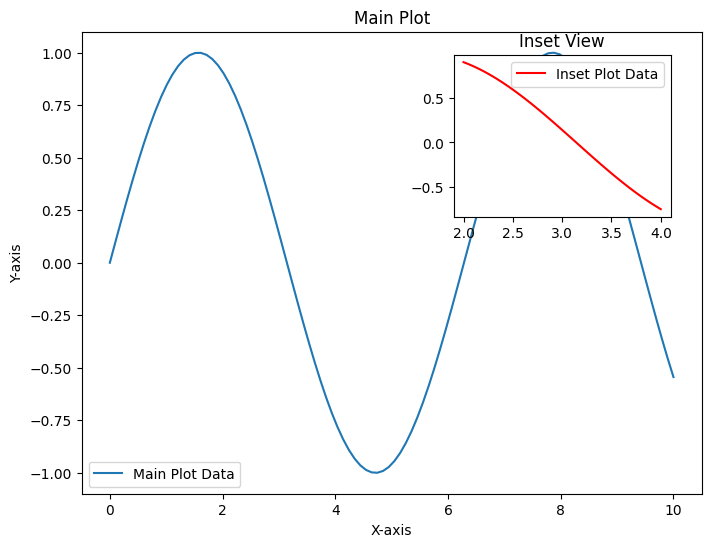

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax_main = plt.subplots(figsize=(8, 6))

# Example data for the main plot
x_main = np.linspace(0, 10, 100)
y_main = np.sin(x_main)
ax_main.plot(x_main, y_main, label='Main Plot Data')
ax_main.set_title('Main Plot')
ax_main.set_xlabel('X-axis')
ax_main.set_ylabel('Y-axis')
ax_main.legend()

# [x_position, y_position, width, height] as fractions of the parent axes
ax_inset = ax_main.inset_axes([0.6, 0.6, 0.35, 0.35])

# Example data for the inset plot (zoomed-in region)
x_inset = np.linspace(2, 4, 50)
y_inset = np.sin(x_inset)
ax_inset.plot(x_inset, y_inset, color='red', label='Inset Plot Data')
#ax_inset.set_title('Inset View')
ax_inset.legend()

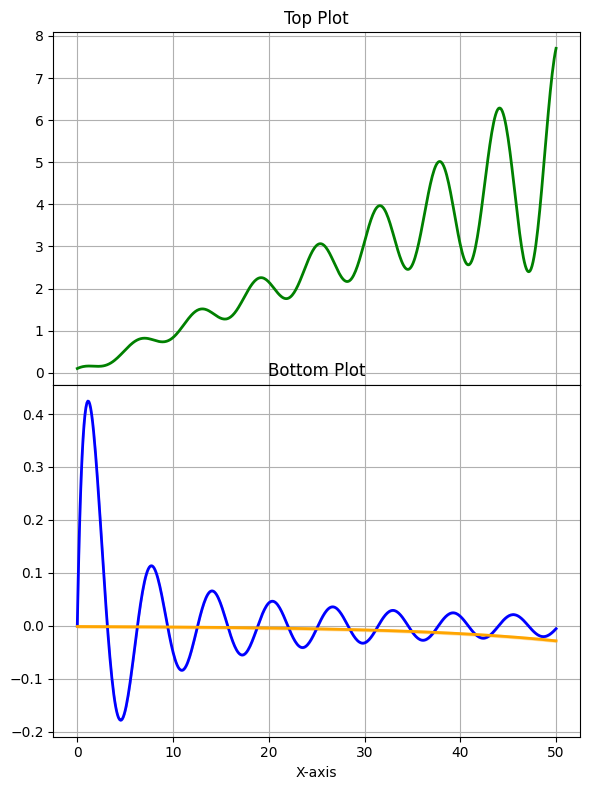

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data Generation (similar to your plot)
x = np.linspace(0, 50, 500)
y_top = np.exp(x / 15) * np.cos(x) * 0.1 + x / 10
y_bottom_blue = np.sin(x) / (x + 1)
y_bottom_orange = -np.exp(x / 15) / 1000

# Create the figure and shared subplots
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 8))

# Plot the top subplot
ax_top.plot(x, y_top, color='green', linewidth=2)
ax_top.set_title('Top Plot')
ax_top.grid(True)
ax_top.tick_params(labelbottom=False)  # Hide x-axis labels on the top plot

# Plot the bottom subplot with shaded regions
ax_bottom.plot(x, y_bottom_blue, color='blue', linewidth=2)
ax_bottom.plot(x, y_bottom_orange, color='orange', linewidth=2)

# Shaded regions (example using fill_between)
ax_bottom.fill_between(x, y_bottom_blue - 0.001, y_bottom_blue + 0.001, color='blue', alpha=0.2)
ax_bottom.fill_between(x, y_bottom_orange - 0.002, y_bottom_orange + 0.002, color='orange', alpha=0.3)

ax_bottom.set_title('Bottom Plot')
ax_bottom.set_xlabel('X-axis')
ax_bottom.grid(True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.0)  # Remove horizontal space between subplots
plt.show()

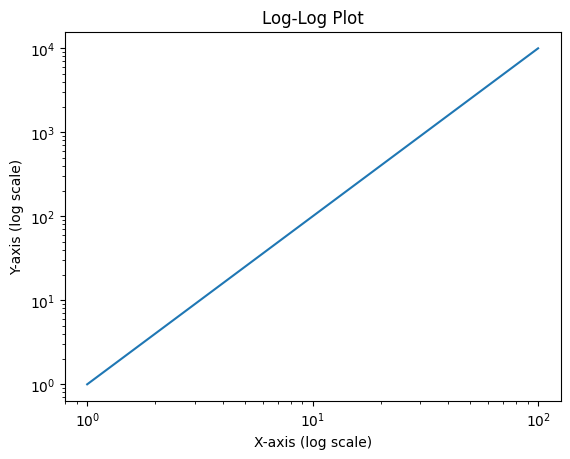

In [2]:
# Axis scales

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = np.logspace(0, 2, 100) # Data from 1 to 100
y = x**2

ax.plot(x, y)
ax.set_xscale('log') # Set x-axis to logarithmic scale
ax.set_yscale('log') # Set y-axis to logarithmic scale
ax.set_title('Log-Log Plot')
ax.set_xlabel('X-axis (log scale)')
ax.set_ylabel('Y-axis (log scale)')
plt.show()